<a href="https://colab.research.google.com/github/bcastan24/Data-Science-Projects/blob/main/baseball_peak_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

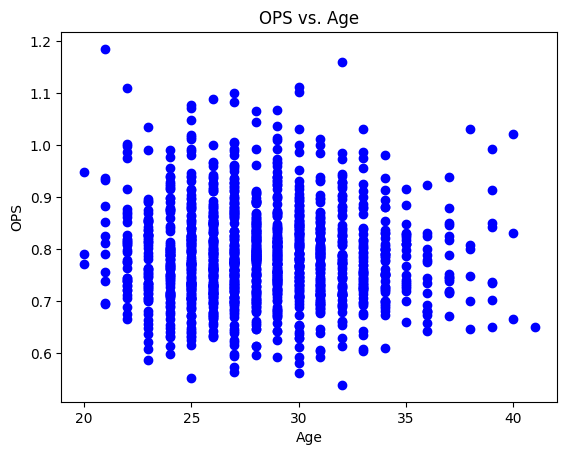

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import batting_stats

df = pd.DataFrame(batting_stats(2015, 2024))
#showing all OPS vs Age
plt.scatter(df['Age'], df['OPS'], color='blue', marker='o')
plt.title('OPS vs. Age')
plt.xlabel('Age')
plt.ylabel('OPS')
plt.show()


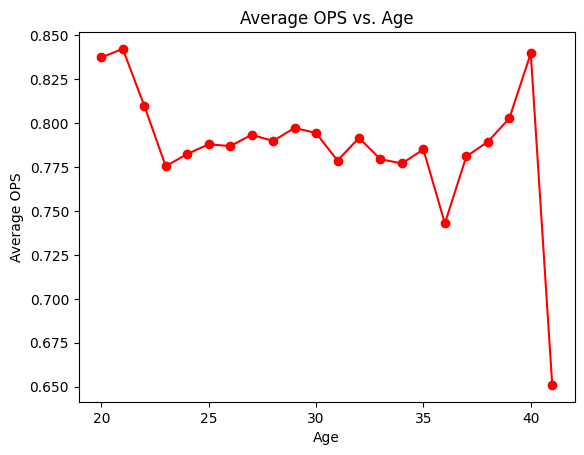

In [4]:
#finding average ops for each age
ages = df['Age'].unique()
ages.sort()
opsArray = []
for age in ages:
    age_df = df[df['Age'] == age]
    average_ops = age_df['OPS'].mean()
    opsArray.append(average_ops)
plt.plot(ages, opsArray, color='red', marker='o')
plt.title('Average OPS vs. Age')
plt.xlabel('Age')
plt.ylabel('Average OPS')
plt.show()

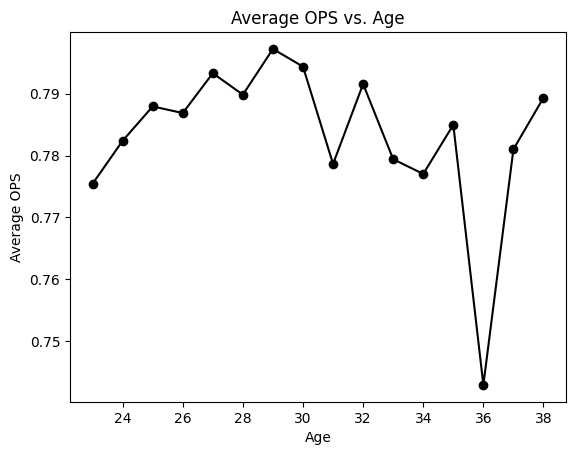

In [5]:
'''
Now the plot above shows that 21 year olds and 40 year olds are the best hitters in the league
Obviously this is not the case in real life, they are outliers
Small sample size is a big factor, there are not many 21 year olds and 40 year olds in the MLB
The ones who are are good enough to be in the league at that age so the stats are clearly inflated
So I will be getting rid of the outliers and seeing what the plot looks like
'''
import numpy as np
opsArrayNorm = []
ages = ages[3:19]

for age in ages:
    age_df = df[df['Age'] == age]
    average_ops = age_df['OPS'].mean()
    opsArrayNorm.append(average_ops)
plt.plot(ages, opsArrayNorm, color='black', marker='o')
plt.title('Average OPS vs. Age')
plt.xlabel('Age')
plt.ylabel('Average OPS')
plt.show()


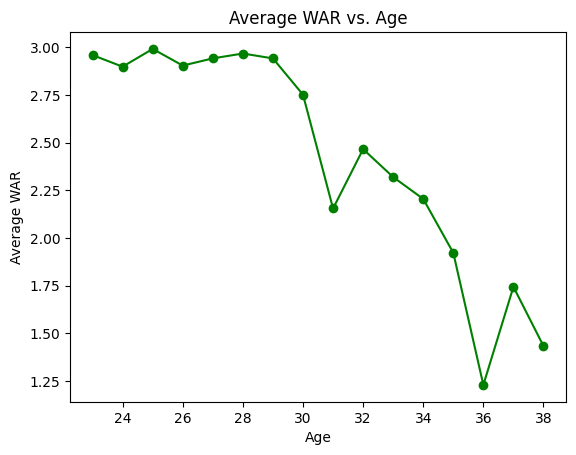

In [6]:
'''
The graph above shows that the ideal age for hitting is 29, while OPS is not the tell all, I do like OPS as an all-in-one stat to estimate measure hitting ability
Next I want to compare WAR vs Age, I will do the same thing as above
'''
warArray = []
for age in ages:
    age_df = df[df['Age'] == age]
    average_war = age_df['L-WAR'].mean()
    warArray.append(average_war)
plt.plot(ages, warArray, color='green', marker='o')
plt.title('Average WAR vs. Age')
plt.xlabel('Age')
plt.ylabel('Average WAR')
plt.show()


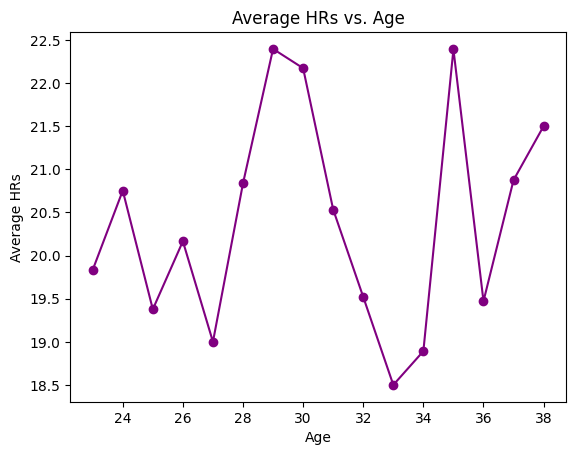

In [7]:
'''
Now the graph above shows that 25 year olds provide the most value
WAR does take into account fielding and baserunning, so when you are younger your more agile and can steal more bases and make better plays in the field
One interesting thing is that in the two graphs right above both show that 31 year olds drop off significantly but then seem to somewhat bounce back
This is just a theory but I believe 31 year olds tend to drop off because that is usually the age that big leaguers are first eligible for free agency
In my experience MLB players tend to have a down year after signing a big contract, I'm not sure why but I have seen it a lot, they usually do bounce back which does corroborate with the data
36 year olds seem to do the same, this is small sample size, only 10 years worth of data, but it shows an interesting trend

Next I want to compare HR vs Age, to see how a players power changes over the course of their career
'''
hrArray = []
for age in ages:
    age_df = df[df['Age'] == age]
    average_hr = age_df['HR'].mean()
    hrArray.append(average_hr)
plt.plot(ages, hrArray, color='purple', marker='o')
plt.title('Average HRs vs. Age')
plt.xlabel('Age')
plt.ylabel('Average HRs')
plt.show()

In [31]:
'''
This graph is very interesting, the graph shows a steep falloff after age 30 but then a major rebound at age 35
I think this is another result of small sample size. But 29 tends to be the athletic peak of a baseball player so this graph helps corroborate that

Lastly I would like to find the age where each stat is at its max and find the average of those ages so I can find the ideal age for hitting
'''

maxOpsIndex = opsArrayNorm.index(max(opsArrayNorm))
maxWarIndex = warArray.index(max(warArray))
maxHrIndex = hrArray.index(max(hrArray))

idealAge = (ages[maxOpsIndex] + ages[maxWarIndex] + ages[maxHrIndex]) / 3
print(idealAge)
'''
According to this the ideal age for hitting is 27.6666 repeating which we can round up to 28
So with this very primitive analysis, the ideal age for hitting is 28 years old.
'''

27.666666666666668
